# **Regressione Ridge (Regolarizzazione di Tikhonov)**


## **1. Modello Matematico della Regressione Ridge**
La **Regressione Ridge**, nota anche come **Regolarizzazione di Tikhonov**, è una variante della regressione lineare che introduce un termine di penalizzazione per ridurre l'overfitting.

La funzione di costo della regressione lineare classica è:

$$
J(β) = \sum_{i=1}^{n} (y_i - X_i β)^2
$$

La **Regressione Ridge** aggiunge un termine di regolarizzazione $ \lambda $ per penalizzare la grandezza dei coefficienti $ β $:

$$
J_{\text{ridge}}(\beta) = \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Dove:
- $ \lambda $ è un parametro di regolarizzazione che controlla la forza della penalizzazione.
- Un valore alto di $ \lambda $ riduce i coefficienti $ \beta $, impedendo l'overfitting.

La stima dei coefficienti è:

$$
\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y
$$


## **2. Implementazione in Python**

In [ ]:
%pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### **2.1 Confronto tra Regressione OLS e Ridge**

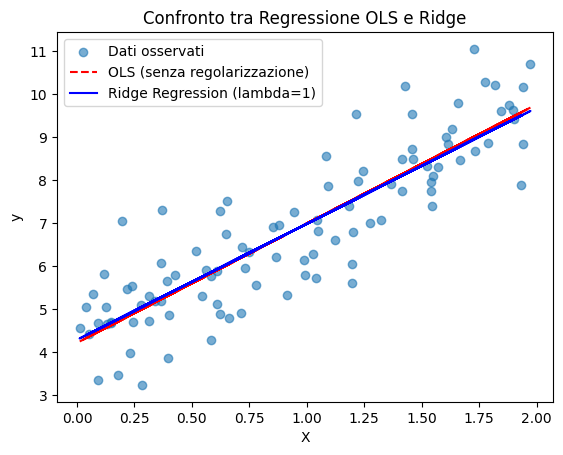

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression

# Generiamo dati sintetici
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Creiamo il modello OLS
ols_model = LinearRegression()
ols_model.fit(X, y)
y_ols_pred = ols_model.predict(X)

# Creiamo il modello Ridge con lambda = 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
y_ridge_pred = ridge_model.predict(X)

# Visualizziamo i risultati
plt.scatter(X, y, label="Dati osservati", alpha=0.6)
plt.plot(X, y_ols_pred, color="red", linestyle="dashed", label="OLS (senza regolarizzazione)")
plt.plot(X, y_ridge_pred, color="blue", linestyle="solid", label="Ridge Regression (lambda=1)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Confronto tra Regressione OLS e Ridge")
plt.show()


### **2.2 Effetto di $ \lambda $ sulla Regolarizzazione**

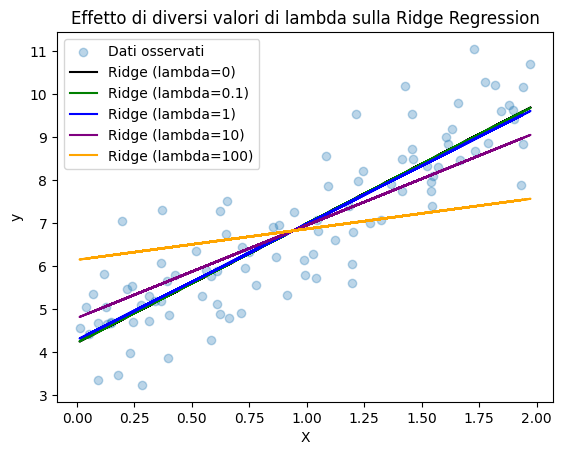

In [2]:

# Differenti valori di lambda
lambdas = [0, 0.1, 1, 10, 100]
colors = ["black", "green", "blue", "purple", "orange"]

plt.scatter(X, y, alpha=0.3, label="Dati osservati")

for l, c in zip(lambdas, colors):
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X, y)
    y_ridge_pred = ridge_model.predict(X)
    plt.plot(X, y_ridge_pred, color=c, label=f"Ridge (lambda={l})")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Effetto di diversi valori di lambda sulla Ridge Regression")
plt.show()


## **3. Valutazione del Modello**

### **3.1 Coefficiente di Determinazione \( R^2 \)**

In [3]:

r2_ols = ols_model.score(X, y)
r2_ridge = ridge_model.score(X, y)

print(f"R-quadro (OLS): {r2_ols}")
print(f"R-quadro (Ridge, lambda=1): {r2_ridge}")


R-quadro (OLS): 0.7692735413614223
R-quadro (Ridge, lambda=1): 0.34746295675634953



## **4. Conclusioni**
- La **Regressione Ridge** è utile quando i dati presentano **multicollinearità**, stabilizzando i coefficienti.
- Il parametro $ \lambda $ controlla la forza della penalizzazione: valori più alti riducono i coefficienti.
- A differenza della **Regressione Lasso**, la Ridge non imposta i coefficienti a zero, ma li riduce gradualmente.
